
## Stock Market Price Predictor 

This is a Supervised Learning AI,So,it required lable data to make Prediction.
I have take my dataset from Nation Stock Exchange(NSE) from date November 2007 to April 2021.
You can Find this Project on My Github account.

## The Dataset contains the following columns:

(Only the main Columns are shown which are used for the train of the AI)


Open - The price on which the stock was at the time market started

Close - The price on which the stock was at the time marked ended

High - Maximum Price during that day

Low - Lowest Price during that day

Volume - The Number of shares traded in a given period

In [1]:
#importing all the Libaries need for the Developement of AI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *

In [2]:
#Getting The Data set for AI
df = pd.read_csv("Dataset/NIFTY50_all.csv")
pd.read_csv("Dataset/NIFTY50_all.csv")

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [3]:
#find out the Describtion of data set 
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [4]:
# getting information on Data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

Text(0.5, 1.0, 'Open vs Close')

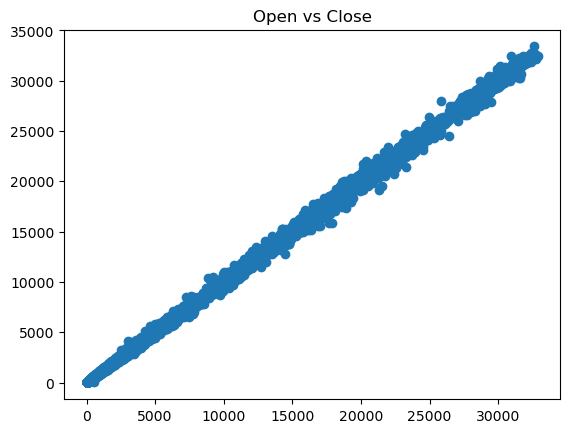

In [5]:
colr = ['red','blue']
plt.scatter(df["Close"],df["Open"])
plt.title("Open vs Close")


In [6]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [7]:

df.head

<bound method NDFrame.head of               Date      Symbol Series  Prev Close    Open     High     Low  \
0       2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1       2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2       2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3       2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4       2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
...            ...         ...    ...         ...     ...      ...     ...   
235187  2021-04-26        ZEEL     EQ      188.00  190.60   191.10  185.10   
235188  2021-04-27        ZEEL     EQ      186.40  188.00   192.95  186.80   
235189  2021-04-28        ZEEL     EQ      188.15  188.80   190.60  187.10   
235190  2021-04-29        ZEEL     EQ      189.10  190.80   191.65  186.00   
235191  2021-04-30        ZEEL     EQ      186.55  185.30   190.95  183.65   

          Last   Close    VWAP   

In [8]:
##Deleting the unWanted Columns
df.drop(columns=['Date','Symbol','Series','Prev Close','Turnover','%Deliverble','Trades','VWAP','Deliverable Volume','Last'],inplace = True)

In [9]:
df.head

<bound method NDFrame.head of           Open     High     Low   Close    Volume
0       770.00  1050.00  770.00  962.90  27294366
1       984.00   990.00  874.00  893.90   4581338
2       909.00   914.75  841.00  884.20   5124121
3       890.00   958.00  890.00  921.55   4609762
4       939.75   995.00  922.00  969.30   2977470
...        ...      ...     ...     ...       ...
235187  190.60   191.10  185.10  186.40   8542755
235188  188.00   192.95  186.80  188.15  14247767
235189  188.80   190.60  187.10  189.10   8429439
235190  190.80   191.65  186.00  186.55   9483009
235191  185.30   190.95  183.65  185.60  11435285

[235192 rows x 5 columns]>

In [10]:
# Finding number of Unqiue values
df.nunique

<bound method DataFrame.nunique of           Open     High     Low   Close    Volume
0       770.00  1050.00  770.00  962.90  27294366
1       984.00   990.00  874.00  893.90   4581338
2       909.00   914.75  841.00  884.20   5124121
3       890.00   958.00  890.00  921.55   4609762
4       939.75   995.00  922.00  969.30   2977470
...        ...      ...     ...     ...       ...
235187  190.60   191.10  185.10  186.40   8542755
235188  188.00   192.95  186.80  188.15  14247767
235189  188.80   190.60  187.10  189.10   8429439
235190  190.80   191.65  186.00  186.55   9483009
235191  185.30   190.95  183.65  185.60  11435285

[235192 rows x 5 columns]>

In [11]:
#finding out Duplicated rows and Suming them all 
df.duplicated().sum()

3

In [12]:
# All the wanted Columns for Developement of AI
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

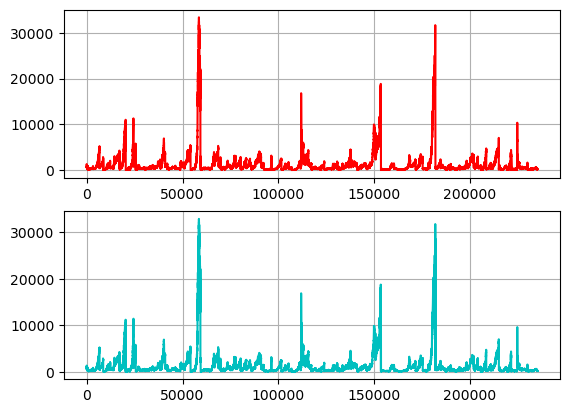

In [13]:
#Ploting the Graph of Open and Close Column of Dateset

x = df["Open"]
plt.subplot(2,1,1)
plt.plot(x,color='r')
plt.grid(True)

y = df["Close"]
plt.subplot(2,1,2)
plt.plot(y,color='c')
plt.grid(True)

In [15]:
#Separating the Columns into two Variables
X = df.drop('Close',axis=1)
y = df['Close']
print("Shape of X :",X.shape)
print("Shape of y :",y.shape)

Shape of X : (235192, 4)
Shape of y : (235192,)


In [16]:
#For Scaleing the Dataset 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled =scaler.fit_transform(y.values.reshape(-1,1)) 
print(X_scaled.shape,X_scaled.size)
print(y_scaled.shape,y_scaled.size)

(235192, 4) 940768
(235192, 1) 235192


In [17]:
#Splitting The data into two parts , Training data and Testing Data  
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size = .2,random_state = 0)
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 


(188153, 4)
(47039, 4)
(188153, 1)
(47039, 1)


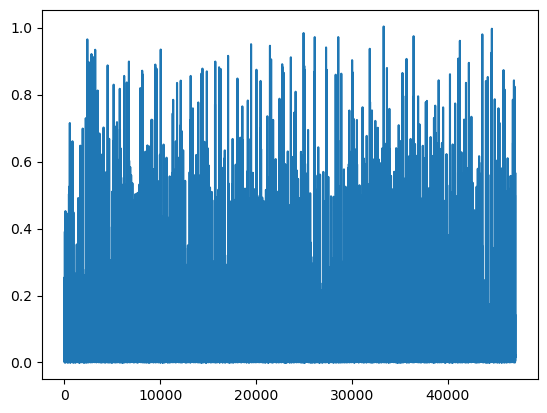

In [18]:


from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
linreg.fit(X_train,y_train)
pred1 = linreg.predict(X_test)

plt.plot(pred1)



In [19]:
print(pred1)

[[0.02628794]
 [0.00841561]
 [0.01721696]
 ...
 [0.03234617]
 [0.01450555]
 [0.02135523]]


In [20]:
from sklearn.metrics import mean_squared_error,r2_score

def calulation(y_test,y_predict):
    mse = mean_squared_error(y_test,y_predict)
    smse = np.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    
    print("Mean Square error is ",mse,"\nSquare root of mse is ",smse,"\nR2 score is ",r2)

calulation(y_test,pred1)

Mean Square error is  5.363324735386366e-07 
Square root of mse is  0.0007323472356325492 
R2 score is  0.9999113560044944


In [21]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [22]:
calulation(y_test, la_p)

Mean Square error is  0.0060505073815841845 
Square root of mse is  0.07778500743449335 
R2 score is  -1.6175788941419356e-05


In [23]:
calulation(y_test, ri_p)

Mean Square error is  9.905337625191725e-07 
Square root of mse is  0.0009952556267206795 
R2 score is  0.9998362864925677


In [24]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {  
                'C': [0.1, 1, 10, 100, 1000],  
                'gamma': [.25,.5,.75,1,1.25,1.50,1.75,2.0], 
                'kernel': ['rbf']
            }   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    

grid.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.25, kernel=rbf;, score=-0.287 total time=   1.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.25, kernel=rbf;, score=-0.355 total time=   0.9s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.25, kernel=rbf;, score=-0.193 total time=   1.0s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.25, kernel=rbf;, score=-0.154 total time=   1.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.25, kernel=rbf;, score=-0.307 total time=   1.0s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.5, kernel=rbf;, score=-0.164 total time=   1.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.5, kernel=rbf;, score=-0.235 total time=   1.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.5, kernel=rbf;, score=-0.092 total time=   0.9s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.5, kernel=rbf;, score=-0.055 total time=   0.9s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.5, kernel=rbf;, score=-0.187 total time=   0.9s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.75, kernel=rbf;, score=-0.092 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.75, kernel=rbf;, score=-0.154 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.75, kernel=rbf;, score=-0.024 total time=   1.1s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.75, kernel=rbf;, score=0.010 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.75, kernel=rbf;, score=-0.108 total time=   0.9s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.047 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.102 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.018 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.051 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.057 total time=   1.0s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=1.25, kernel=rbf;, score=-0.014 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=1.25, kernel=rbf;, score=-0.074 total time=   1.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=1.25, kernel=rbf;, score=0.042 total time=   1.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=1.25, kernel=rbf;, score=0.079 total time=   1.0s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=1.25, kernel=rbf;, score=-0.031 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=1.5, kernel=rbf;, score=-0.003 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=1.5, kernel=rbf;, score=-0.059 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=1.5, kernel=rbf;, score=0.054 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=1.5, kernel=rbf;, score=0.093 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=1.5, kernel=rbf;, score=-0.017 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=1.75, kernel=rbf;, score=0.008 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=1.75, kernel=rbf;, score=-0.049 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=1.75, kernel=rbf;, score=0.057 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=1.75, kernel=rbf;, score=0.098 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=1.75, kernel=rbf;, score=-0.008 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=2.0, kernel=rbf;, score=-0.005 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=2.0, kernel=rbf;, score=-0.057 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=2.0, kernel=rbf;, score=0.066 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=2.0, kernel=rbf;, score=0.089 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=2.0, kernel=rbf;, score=-0.015 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.25, kernel=rbf;, score=-0.288 total time=   0.2s
[CV 2/5] END ......C=1, gamma=0.25, kernel=rbf;, score=-0.357 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.25, kernel=rbf;, score=-0.208 total time=   0.2s
[CV 4/5] END ......C=1, gamma=0.25, kernel=rbf;, score=-0.165 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.25, kernel=rbf;, score=-0.307 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.5, kernel=rbf;, score=-0.164 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.5, kernel=rbf;, score=-0.226 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.5, kernel=rbf;, score=-0.091 total time=   0.4s
[CV 4/5] END .......C=1, gamma=0.5, kernel=rbf;, score=-0.053 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.5, kernel=rbf;, score=-0.170 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.75, kernel=rbf;, score=-0.093 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.75, kernel=rbf;, score=-0.149 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.75, kernel=rbf;, score=-0.023 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.75, kernel=rbf;, score=0.013 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.75, kernel=rbf;, score=-0.102 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.035 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.091 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.029 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.063 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.051 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=1.25, kernel=rbf;, score=-0.015 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=1.25, kernel=rbf;, score=-0.059 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=1.25, kernel=rbf;, score=0.058 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=1.25, kernel=rbf;, score=0.090 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=1.25, kernel=rbf;, score=-0.026 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=1.5, kernel=rbf;, score=-0.000 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=1.5, kernel=rbf;, score=-0.056 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=1.5, kernel=rbf;, score=0.061 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=1.5, kernel=rbf;, score=0.092 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=1.5, kernel=rbf;, score=-0.011 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=1.75, kernel=rbf;, score=0.007 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=1.75, kernel=rbf;, score=-0.048 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=1.75, kernel=rbf;, score=0.067 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=1.75, kernel=rbf;, score=0.099 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=1.75, kernel=rbf;, score=-0.007 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=2.0, kernel=rbf;, score=0.008 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=2.0, kernel=rbf;, score=-0.047 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=2.0, kernel=rbf;, score=0.068 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=2.0, kernel=rbf;, score=0.100 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=2.0, kernel=rbf;, score=-0.006 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.25, kernel=rbf;, score=-0.288 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.25, kernel=rbf;, score=-0.357 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.25, kernel=rbf;, score=-0.208 total time=   0.3s
[CV 4/5] END .....C=10, gamma=0.25, kernel=rbf;, score=-0.165 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.25, kernel=rbf;, score=-0.307 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.5, kernel=rbf;, score=-0.164 total time=   0.2s
[CV 2/5] END ......C=10, gamma=0.5, kernel=rbf;, score=-0.226 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.5, kernel=rbf;, score=-0.091 total time=   0.2s
[CV 4/5] END ......C=10, gamma=0.5, kernel=rbf;, score=-0.053 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.5, kernel=rbf;, score=-0.170 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.75, kernel=rbf;, score=-0.093 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.75, kernel=rbf;, score=-0.149 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.75, kernel=rbf;, score=-0.023 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.75, kernel=rbf;, score=0.013 total time=   0.4s
[CV 5/5] END .....C=10, gamma=0.75, kernel=rbf;, score=-0.102 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.035 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.091 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.029 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.063 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.051 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=1.25, kernel=rbf;, score=-0.015 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=1.25, kernel=rbf;, score=-0.059 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=1.25, kernel=rbf;, score=0.058 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=1.25, kernel=rbf;, score=0.090 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=1.25, kernel=rbf;, score=-0.026 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=1.5, kernel=rbf;, score=-0.000 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=1.5, kernel=rbf;, score=-0.056 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=1.5, kernel=rbf;, score=0.061 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=1.5, kernel=rbf;, score=0.092 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=1.5, kernel=rbf;, score=-0.011 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=1.75, kernel=rbf;, score=0.007 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=1.75, kernel=rbf;, score=-0.048 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=1.75, kernel=rbf;, score=0.067 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=1.75, kernel=rbf;, score=0.099 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=1.75, kernel=rbf;, score=-0.007 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=2.0, kernel=rbf;, score=0.008 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=2.0, kernel=rbf;, score=-0.047 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=2.0, kernel=rbf;, score=0.068 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=2.0, kernel=rbf;, score=0.100 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=2.0, kernel=rbf;, score=-0.006 total time=   0.2s
[CV 1/5] END ....C=100, gamma=0.25, kernel=rbf;, score=-0.288 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.25, kernel=rbf;, score=-0.357 total time=   0.2s
[CV 3/5] END ....C=100, gamma=0.25, kernel=rbf;, score=-0.208 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.25, kernel=rbf;, score=-0.165 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.25, kernel=rbf;, score=-0.307 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.5, kernel=rbf;, score=-0.164 total time=   0.2s
[CV 2/5] END .....C=100, gamma=0.5, kernel=rbf;, score=-0.226 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.5, kernel=rbf;, score=-0.091 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.5, kernel=rbf;, score=-0.053 total time=   0.2s
[CV 5/5] END .....C=100, gamma=0.5, kernel=rbf;, score=-0.170 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.75, kernel=rbf;, score=-0.093 total time=   1.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.75, kernel=rbf;, score=-0.149 total time=   1.1s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.75, kernel=rbf;, score=-0.023 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.75, kernel=rbf;, score=0.013 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.75, kernel=rbf;, score=-0.102 total time=   1.1s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.035 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.091 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.029 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.063 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.051 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=1.25, kernel=rbf;, score=-0.015 total time=   0.9s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=1.25, kernel=rbf;, score=-0.059 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=1.25, kernel=rbf;, score=0.058 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=1.25, kernel=rbf;, score=0.090 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=1.25, kernel=rbf;, score=-0.026 total time=   1.0s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=1.5, kernel=rbf;, score=-0.000 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=1.5, kernel=rbf;, score=-0.056 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=1.5, kernel=rbf;, score=0.061 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=1.5, kernel=rbf;, score=0.092 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=1.5, kernel=rbf;, score=-0.011 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=1.75, kernel=rbf;, score=0.007 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=1.75, kernel=rbf;, score=-0.048 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=1.75, kernel=rbf;, score=0.067 total time=   1.0s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=1.75, kernel=rbf;, score=0.099 total time=   1.0s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=1.75, kernel=rbf;, score=-0.007 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=2.0, kernel=rbf;, score=0.008 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=2.0, kernel=rbf;, score=-0.047 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=2.0, kernel=rbf;, score=0.068 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=2.0, kernel=rbf;, score=0.100 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=2.0, kernel=rbf;, score=-0.006 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.25, kernel=rbf;, score=-0.288 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.25, kernel=rbf;, score=-0.357 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.25, kernel=rbf;, score=-0.208 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.25, kernel=rbf;, score=-0.165 total time=   0.2s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.25, kernel=rbf;, score=-0.307 total time=   1.1s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.5, kernel=rbf;, score=-0.164 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.5, kernel=rbf;, score=-0.226 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.5, kernel=rbf;, score=-0.091 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.5, kernel=rbf;, score=-0.053 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.5, kernel=rbf;, score=-0.170 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.75, kernel=rbf;, score=-0.093 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.75, kernel=rbf;, score=-0.149 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.75, kernel=rbf;, score=-0.023 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.75, kernel=rbf;, score=0.013 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.75, kernel=rbf;, score=-0.102 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.035 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.091 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.029 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.063 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.051 total time=   0.5s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=1.25, kernel=rbf;, score=-0.015 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=1.25, kernel=rbf;, score=-0.059 total time=   0.9s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=1.25, kernel=rbf;, score=0.058 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=1.25, kernel=rbf;, score=0.090 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=1.25, kernel=rbf;, score=-0.026 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=1.5, kernel=rbf;, score=-0.000 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=1.5, kernel=rbf;, score=-0.056 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=1.5, kernel=rbf;, score=0.061 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=1.5, kernel=rbf;, score=0.092 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=1.5, kernel=rbf;, score=-0.011 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=1.75, kernel=rbf;, score=0.007 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=1.75, kernel=rbf;, score=-0.048 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=1.75, kernel=rbf;, score=0.067 total time=   0.3s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=1.75, kernel=rbf;, score=0.099 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=1.75, kernel=rbf;, score=-0.007 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=2.0, kernel=rbf;, score=0.008 total time=   1.0s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=2.0, kernel=rbf;, score=-0.047 total time=   0.8s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=2.0, kernel=rbf;, score=0.068 total time=   0.6s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=2.0, kernel=rbf;, score=0.100 total time=   0.7s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=2.0, kernel=rbf;, score=-0.006 total time=   0.4s


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 
print(svr_pred)


/home/lonewolf/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.12035337 0.10633508 0.11331021 ... 0.12562162 0.11113499 0.11660056]


In [26]:
prediction = svr.predict([[34,54,23,2344]])
print(prediction*100)

[48.47173406]


In [27]:
import pickle

pickle.dump(ri,open('model.pkl','wb')) 

model = pickle.load(open('model.pkl','rb'))
